## 2.1 vector and matrix computations

### 2.1.1 Vector computation

In [1]:
a = [1, 2, 3] # ベクトルに対してスカラー値を掛けると要素毎に値が掛け算されたベクトルが出力される
2 * a

3-element Vector{Int64}:
 2
 4
 6

In [2]:
b = [4, 5, 6]
a + b # ベクトルのサイズが同じであることが必要

3-element Vector{Int64}:
 5
 7
 9

In [3]:
a .* b # 対応する要素毎に掛け合わせたい場合は .* によってブロードキャストする

3-element Vector{Int64}:
  4
 10
 18

In [4]:
sum(a .* b) # 内積を行うには，上記の各要素の掛け算をsum関数で足し合わせる

32

In [5]:
a' * b # 内積は，1x3と3x1の行列の積と考えると記述がシンプルになる

32

### 2.1.2 Matrix computation

In [6]:
A = [1 2 3;
     4 5 6]
B = [10 20 30; 
     40 50 60]
A + B # 行列同士の和

2×3 Matrix{Int64}:
 11  22  33
 44  55  66

In [7]:
A = [1 2; 
     3 4;
     5 6] # 3x2行列
B = [10 20 30 40; 
     50 60 70 80] # 2x4行列　
C = A * B # 行列積(matrix product)

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

行列Cのi列j行目の要素は次式で計算される．
$$
C_{i, j} = \sum_{k = 1}^{K} A_{i, k} B_{k, j}
$$

In [8]:
M = size(A, 1) # Aの行数
N = size(B, 2) # Bの列数

# M x N の行列を作成
C = [sum(A[i,:] .* B[:,j]) for i in 1:M, j in 1:N]

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

In [9]:
B * A # 左側の行列の列数と右側の行列の行数が一致していないのでエラー（Dimension Mismatch)

LoadError: DimensionMismatch: matrix A has dimensions (2,4), matrix B has dimensions (3,2)

In [10]:
A = [1 2; 
     3 4; 
     5 6]
I = [1 0 0; 
     0 1 0;
     0 0 1]
I * A # A * Iではない

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

In [11]:
A = [1 2 3;
     4 5 6]
A' # Juliaでは転置を ' で表す

3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6

In [12]:
a = [1, 2, 3]
b = [5, 7]
a * b'

3×2 Matrix{Int64}:
  5   7
 10  14
 15  21

In [13]:
f2(x, y) = 2*x + y
f2.(a, b')

3×2 Matrix{Int64}:
  7   9
  9  11
 11  13

In [14]:
A = [1 2; 
     3 4]
B = inv(A) # 逆行列はinv関数

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [15]:
A * B # 数値誤差の発生

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

In [16]:
B * A # 数値誤差の発生

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [17]:
println(B) # 数値誤差の確認

[-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]


In [18]:
A = Rational{Int}[1 2;
                  3 4]
B = inv(A)
println(A * B)
println(B * A)

Rational{Int64}[1//1 0//1; 0//1 1//1]
Rational{Int64}[1//1 0//1; 0//1 1//1]


In [19]:
A = Rational{Int}[1 2; 
                  3 4]
sol = inv(A) * [-1, 1]

2-element Vector{Rational{Int64}}:
  3//1
 -2//1

## 2.2 Computing Statistics

In [20]:
using Statistics

In [21]:
X = rand(5)

5-element Vector{Float64}:
 0.15416123291940897
 0.631954259278765
 0.4138739868924606
 0.5984196002862292
 0.7439966056560108

In [22]:
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.305467  0.974431  0.415242  0.887006  0.153371
 0.627367  0.677907  0.513394  0.705684  0.019221

### 2.2.1 Sum and Mean

合計（sum）
$$
s = \sum_{n=1}^{N} x_n
$$
平均（mean）
$$
\mu = \cfrac{1}{N} \sum_{n=1}^{N} x_n
$$

In [23]:
println(sum(X))
println(mean(X))

2.5424056850328745
0.5084811370065749


In [24]:
println(sum(Y))
println(sum(Y, dims=1))
println(sum(Y, dims=2))
println(mean(Y))
println(mean(Y, dims=1))
println(mean(Y, dims=2))

5.279090695512473
[0.9328338380803505 1.6523386767196613 0.9286354424264194 1.5926904209187893 0.1725923173672529]
[2.7355173627952607; 2.5435733327172123;;]
0.5279090695512473
[0.46641691904017524 0.8261693383598306 0.4643177212132097 0.7963452104593947 0.08629615868362644]
[0.5471034725590521; 0.5087146665434424;;]


### 2.2.2 Variance and Standard Derivation

分散（Variance）
$$
v = \cfrac{1}{N-1} \sum_{n=1}^{N} (x_n - \mu)^2
$$
標準偏差（standard deviation)
$$
\sigma = \sqrt{v}
$$

In [25]:
println(std(X))
println(std(X).^2)
println(var(X))

0.23091945693193838
0.053323795589741346
0.05332379558974134


### 2.2.3 Covariance

共分散（covariance）

D次元のベクトルを$\rm{y_n}$とし，これが$\rm{Y} = \{\rm{y_1}, \rm{y_2}, \dots, \rm{y_N}\}$のように並んでいるとする．

$i$次元目と$j$次元目の共分散は以下のように定義される（$\mu_i$および$\nu_j$はそれぞれの次元の平均値）
$$
{\rm{Cov}}_{i, j} = \cfrac{1}{N-1} \sum_{n=1}^{N} (x_{n,i} - \mu_i)(x_{n,j} - mu_{j})
$$

In [26]:
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.0518101  -0.0477257   0.0157976   -0.0291839   -0.0215916
 -0.0477257   0.0439632  -0.0145522    0.0268832    0.0198894
  0.0157976  -0.0145522   0.00481691  -0.00889859  -0.00658357
 -0.0291839   0.0268832  -0.00889859   0.0164389    0.0121622
 -0.0215916   0.0198894  -0.00658357   0.0121622    0.00899816

In [27]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
 0.132236   0.0756732
 0.0756732  0.0802819

## 2.3 Parameters of statistics and probability distributions

In [28]:
using Distributions
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
Z

10000-element Vector{Float64}:
  3.3386321351683597
 -1.319973540966331
  1.3872663060437547
  3.25390387133963
  1.8862661668384604
  4.44912713728719
 -0.5009378117339285
  4.890996006590012
  2.074978425203105
  0.13289999445182787
  1.3366100631806308
  2.310906570595213
 -0.6639919979175435
  ⋮
  3.9853021115685796
  2.5466718941243855
 -2.471583790344291
  2.1022432253787526
  4.681987517606573
  1.4142328878763715
  0.6070043043582739
  0.19633906368682252
  2.0517380934479963
  2.362354901370577
  0.37060104227994306
 -2.215104386828871

In [29]:
println(mean(Z))
println(std(Z))

1.5147032292554086
1.977240238207934


## 2.4 Differential Calculation

### 2.4.1 Differentiation of functions of one variable

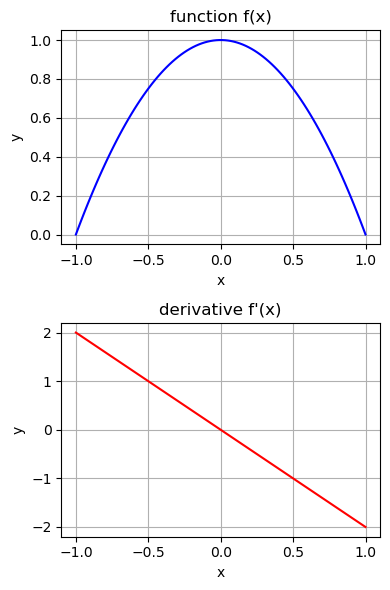

In [30]:
using PyPlot

# f(x)を二次関数として定義
f(x) = -(x + 1)*(x - 1)

# hを微小な値として設定（10のマイナス10乗）
h = 1.0e-10

# 導関数f'の近似式
fd(a) = (f(a + h) - f(a)) / h # f'だと"syntax: invalid function name "f'""となりエラー

# 関数の可視化範囲
xs = range(-1, 1, length = 100)

fig, axes = subplots(2, 1, figsize=(4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, fd.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative f'(x)")

tight_layout()

### 2.4.2 Differentiation of functions of many variables

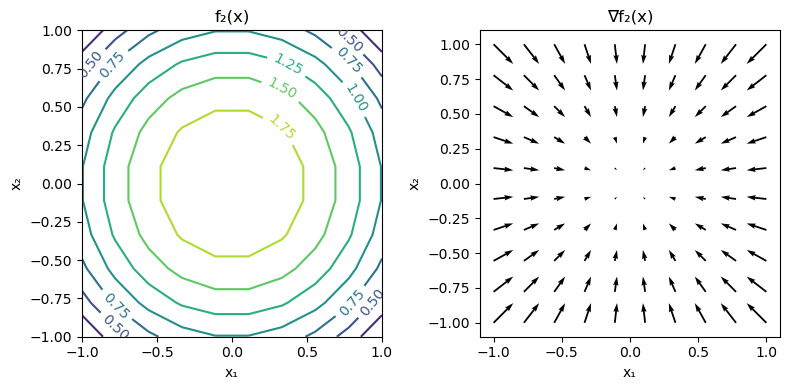

In [31]:
# グラフを可視化する際の解像度
L = 10

# f₂(x)を可視化する範囲
xs₁ = range(-1, 1, length = L)
xs₂ = range(-1, 1, length = L)

# 2変数関数の定義
f₂(x) = -(x .+ 1)'*(x .- 1)

# 2変数関数の勾配
∇f₂(x) = -2x

fig, axes = subplots(1, 2, figsize = (8, 4))

# 関数の等高線図の可視化
cs = axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs, inline = true)
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].set_title("f₂(x)")

# 勾配ベクトルの計算と可視化
vec1 = [∇f₂([x₁, x₂])[1] for x₁ in xs₁, x₂ in xs₂]
vec2 = [∇f₂([x₁, x₂])[2] for x₁ in xs₁, x₂ in xs₂]

axes[2].quiver(repeat(xs₁, 1, L), repeat(xs₂', L, 1), vec1, vec2)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")
axes[2].set_title("∇f₂(x)")

tight_layout()

In [32]:
using ForwardDiff

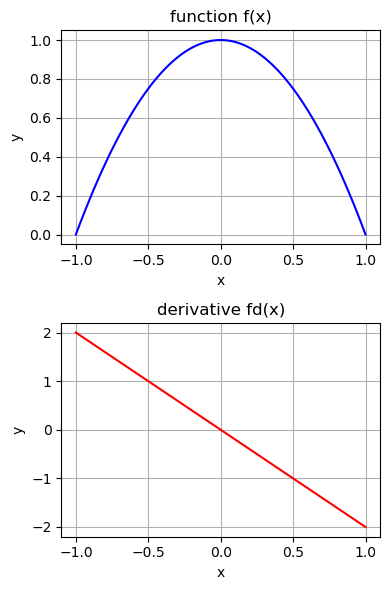

In [33]:
# 二次関数を定義
f(x) = -(x + 1)*(x - 1)

# 自動微分によって導関数fd(x)を求める（d = ')
fd(x) = ForwardDiff.derivative(f, x)

# 関数の可視化範囲
xs = range(-1, 1, length = 100)

fig, axes = subplots(2, 1, figsize = (4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, fd.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative fd(x)")

tight_layout()

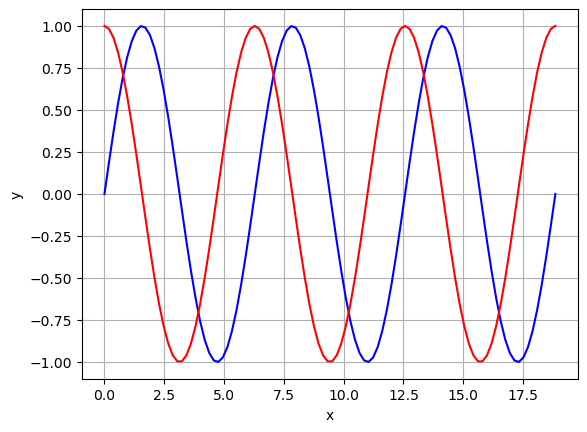

PyObject <bound method Axes.legend of <AxesSubplot:xlabel='x', ylabel='y'>>

In [34]:
fig, ax = subplots()
xs = range(0, 2pi * 3, length = 100)

# sin(x)をプロット
ax.plot(xs, sin.(xs), color = "b", label = "sin(x)")

# 導関数をプロット
ax.plot(xs, map(x -> ForwardDiff.derivative(sin, x), xs), 
    color = "r", label = "sin'(x)")
ax.grid()
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend

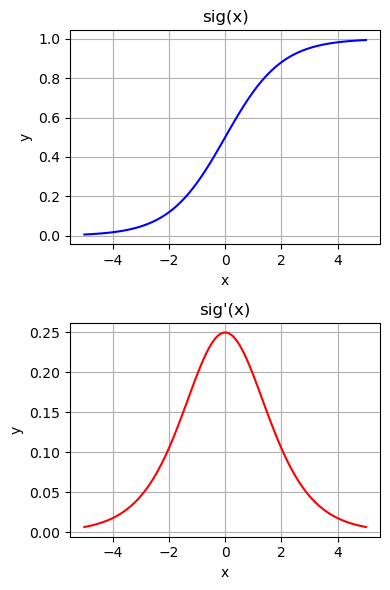

In [37]:
# シグモイド関数
sig(x) = 1 / (1 + exp(-x))

xs = range(-5, +5, length = 100)
fig, axes = subplots(2, 1, figsize = (4, 6))

# シグモイド関数をプロット
axes[1].plot(xs, sig.(xs), color = "b")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("sig(x)")
axes[1].grid()

# 導関数をプロット
axes[2].plot(xs, map(x -> ForwardDiff.derivative(sig, x), xs), color = "r")
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("sig'(x)")
axes[2].grid()

tight_layout()

## 2.5 Function optimization

1変数の連続関数に関する最大化

1. 初期値 $x_1$, 最大繰り返し数 maxtier $> 2$, ステップサイズ$\eta > 0$を設定する
2. $2 < i < $ maxtier で以下を繰り返す

$ x_i = x_{i-1} + \eta f'(x_i -1)$

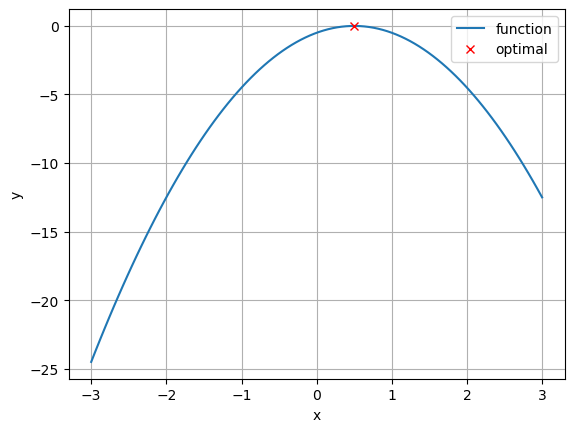

PyObject <matplotlib.legend.Legend object at 0x7fd46ba5b4f0>

In [38]:
# 最大値を探したい目的関数
x_opt = 0.50
f(x) = -2(x - x_opt)^2

fig, ax = subplots()
xs = range(-3, 3, length = 100)
ax.plot(xs, f.(xs), label = "function")
ax.plot(x_opt, f(x_opt), "rx", label = "optimal")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [43]:
# 1変数関数の最適化
function gradient_method_1dim(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)
    
    # 勾配
    fd(x) = ForwardDiff.derivative(f, x)
    
    # 初期値
    x_seq[1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η * fd(x_seq[i-1])
    end
    
    x_seq
end

gradient_method_1dim (generic function with 1 method)

In [44]:
# 探索の初期値
x_init = -2.5

# 探索の繰り返し数
maxiter = 20

# ステップサイズ
η = 0.1

# 最適化計算を実行
x_seq = gradient_method_1dim(f, x_init, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

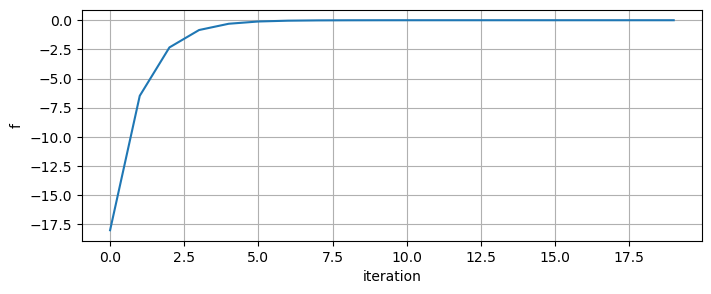

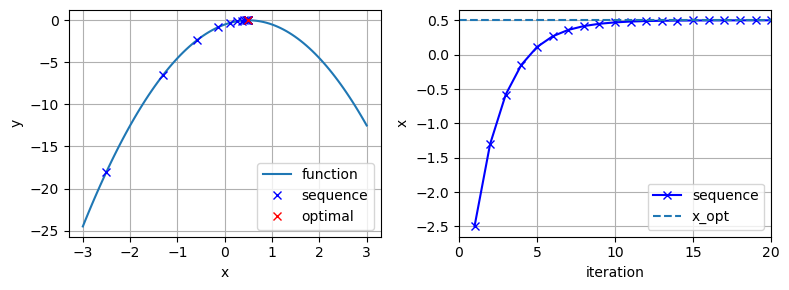

In [56]:
# 目的関数の値をステップ毎にプロット
fig, ax = subplots(figsize = (8, 3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

fig, axes = subplots(1, 2, figsize = (8, 3))

# 関数のプロット
axes[1].plot(xs, f.(xs), label = "function")

# 探索の過程
axes[1].plot(x_seq, f.(x_seq), "bx", label = "sequence")

# 最適値
axes[1].plot(x_opt, f(x_opt), "rx", label = "optimal")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].grid()
axes[1].legend()

# 探索の過程をステップごとにプロット
axes[2].plot(1:maxiter, x_seq, "bx-", label = "sequence")
axes[2].hlines(x_opt, 0, maxiter, ls = "--", label = "x_opt")
axes[2].set_xlim([0, maxiter])
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("x")
axes[2].grid()
axes[2].legend()

tight_layout()